In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("student_marks.csv")

In [5]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [5]:
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [6]:
#check who got distinction inmaths
df.loc[df["Maths"]>=75,["Name", "Gender", "DOB", "Maths"]]

,Name,Gender,DOB,Maths
1,Suresh,M,04-05-1987,75
3,Jessica,F,12-08-1990,78
9,Mukesh,M,02-09-1989,96


In [7]:
#Create a new column of aggregate marks
total_marks=pd.Series()
total_marks=0
subjects=['Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'History', 'Economics', 'Civics']
for subjects in subjects:
    total_marks=total_marks+df[subjects]

In [10]:
df["total_marks"]=total_marks

In [16]:
total_marks

0    470
1    524
2    556
3    586
4    587
5    556
6    496
7    517
8    587
9    566
dtype: int64

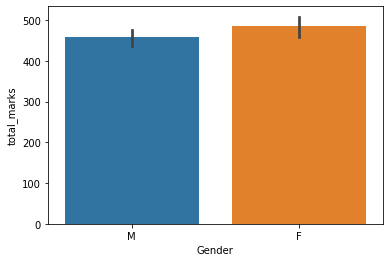

In [17]:
#lets graphically show the aggregate marks of male vs aggregate marks of female
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df["Gender"], y=df["total_marks"], data=df)
plt.show()

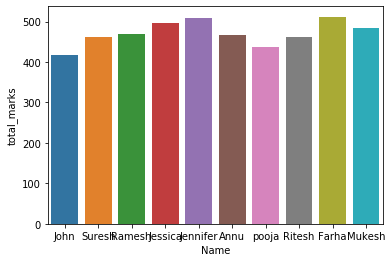

In [18]:
#lets graphically compare the total marks of each student
sns.barplot(x=df["Name"], y=df["total_marks"], data=df)
plt.show()

In [19]:
#Lets describe the table
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,total_marks
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,471.800000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,29.995555
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,418.000000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,461.500000
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,468.000000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,493.500000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,512.000000


In [27]:
#Lets findout the names of toppers in each subject and their marks

import pprint
subjects=['Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'History', 'Economics', 'Civics']
for subjects in subjects:
    print(df.loc[df[subjects]==df[subjects].max(), ['Name', 'Gender', 'DOB', subjects]])
    print()
    print()

     Name Gender         DOB  Maths
9  Mukesh      M  02-09-1989     96


       Name Gender         DOB  Physics
1    Suresh      M  04-05-1987       96
3   Jessica      F  12-08-1990       96
4  Jennifer      F  02-09-1989       96


     Name Gender         DOB  Chemistry
2  Ramesh      M  25-05-1989         89
8   Farha      F  12-08-1990         89


   Name Gender         DOB  English
5  Annu      F  05-04-1988       89


       Name Gender         DOB  Biology
4  Jennifer      F  02-09-1989       96


   Name Gender         DOB  History
0  John      M  05-04-1988       89


      Name Gender         DOB  Economics
3  Jessica      F  12-08-1990         89
5     Annu      F  05-04-1988         89


    Name Gender         DOB  Civics
8  Farha      F  12-08-1990      89




# EDA on TITANIC datastet

In [29]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
#Lets check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
#replace all the blank values with 0 later impute these 0
import numpy as np
df["Age"]=df["Age"].replace(df["Age"].iloc[17],0)

In [41]:
#similarly we will do for cabin column
df["Cabin"]=df["Cabin"].replace(df["Cabin"].iloc[0],0)

In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
#Now lets change the datatype from object to int
cols_obj=["PassengerId", "Survived", "Pclass", "SibSp", "Parch",]
for col in cols_obj:
    df[col]=df[col].astype(int)

In [47]:
#Now lets change the datatype from object to float
cols_obj1=["Age", "Fare"]
for col in cols_obj1:
    df[col]=df[col].astype(float)

In [49]:
df.dtypes

PassengerId      int32
Survived         int32
Pclass           int32
Name            object
Sex             object
Age            float64
SibSp            int32
Parch            int32
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
#Lets impute the 0 with mean in age column
df["Age"].replace(0, df["Age"].mean(), inplace=True)

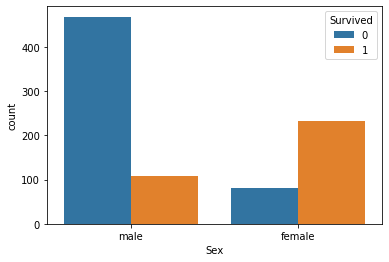

In [54]:
#Now finally lets do some mean age column
#Lets check the count of male survived vs female sutrvived
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

#From below plot its clear that out of the total number of males very few males survived & on the other hand very few females survived

(array([ 38.,  41., 129.,  73.,  34.,  20.,   6.,   0.,   1.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

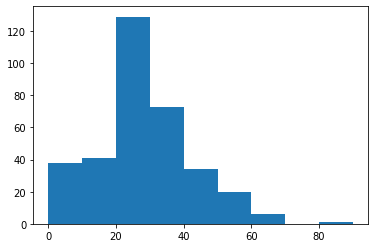

In [55]:
#Lets in what age range maximum people survied
plt.hist(x="Age", bins=range(0, 100, 10), data=df.loc[df["Survived"]==1])

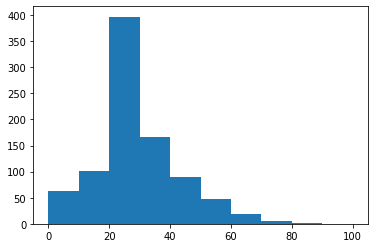

In [57]:
#counts of people in age range
plt.hist(x="Age", bins=range(0, 110, 10), data=df)
plt.show()

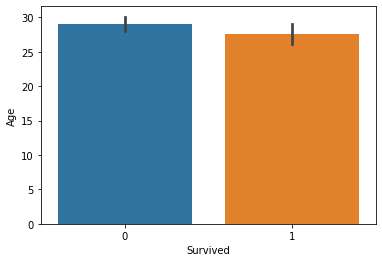

In [59]:
#what is the average age of survived and not survived
sns.barplot(x="Survived", y="Age", data=df)
plt.show()

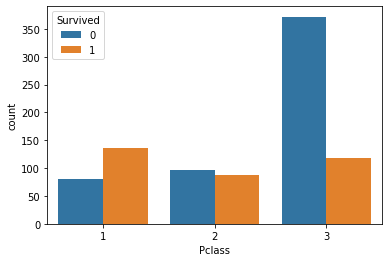

In [61]:
#Lets check the number of people who survived and not survived in each class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()
#from the below graph it is clear that in first class more people survived than dying
# in 2nd class no. of people who survived were less but almost equal to the not survived
#But in 3rd class no. of people who survived were less than who not survived

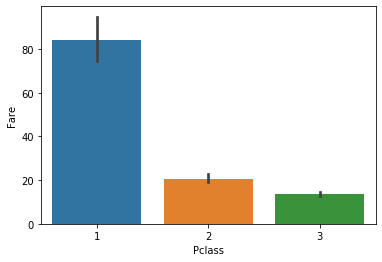

In [62]:
#what was the fare price for 1st & 2nd class and 3rd class
sns.barplot(x="Pclass", y="Fare", data=df)
plt.show()

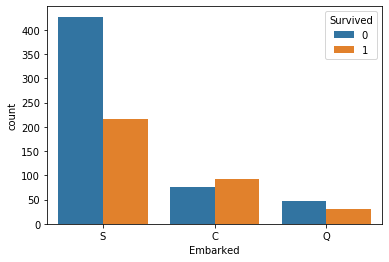

In [63]:
#Embarking vs Survival
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.show()

# EDA on WINE Dataset

In [65]:
df=pd.read_csv("winedataset.csv")
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [66]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [67]:
#Lets check the datatypes
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [73]:
#DATASET already in float type (below steps for reference)

#Changing the datatypes of hue
df["hue"]=df["Hue"].astype(float)

In [70]:
#changing the datatype of Nonflavanoid phenols
df["Nonflavanoid phenols"]=df["Nonflavanoid phenols"].astype(float)

In [72]:
#Lets check correlation matrix
df.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,hue
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,-0.617369
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.071747
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.561296
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.074667
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.273955
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.055398
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.433681
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.543479
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.262640
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.295544


In [74]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,hue
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.957449
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.228572
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.480000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.782500
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,0.965000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,1.120000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,1.710000


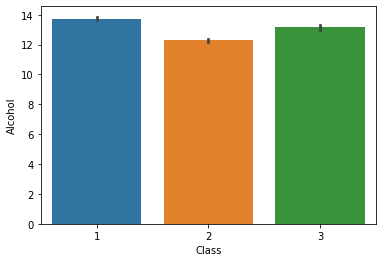

In [75]:
#Graphical EDA
sns.barplot(x="Class", y="Alcohol", data=df)
plt.show()

In [78]:
#Lets check the outliers
from scipy.stats import zscore
z_score=zscore(df)
df.loc[(abs(z_score)<3).all(axis=1)].shape
#Here we can say there are total of 10 outliers in the wine dataset

(168, 15)

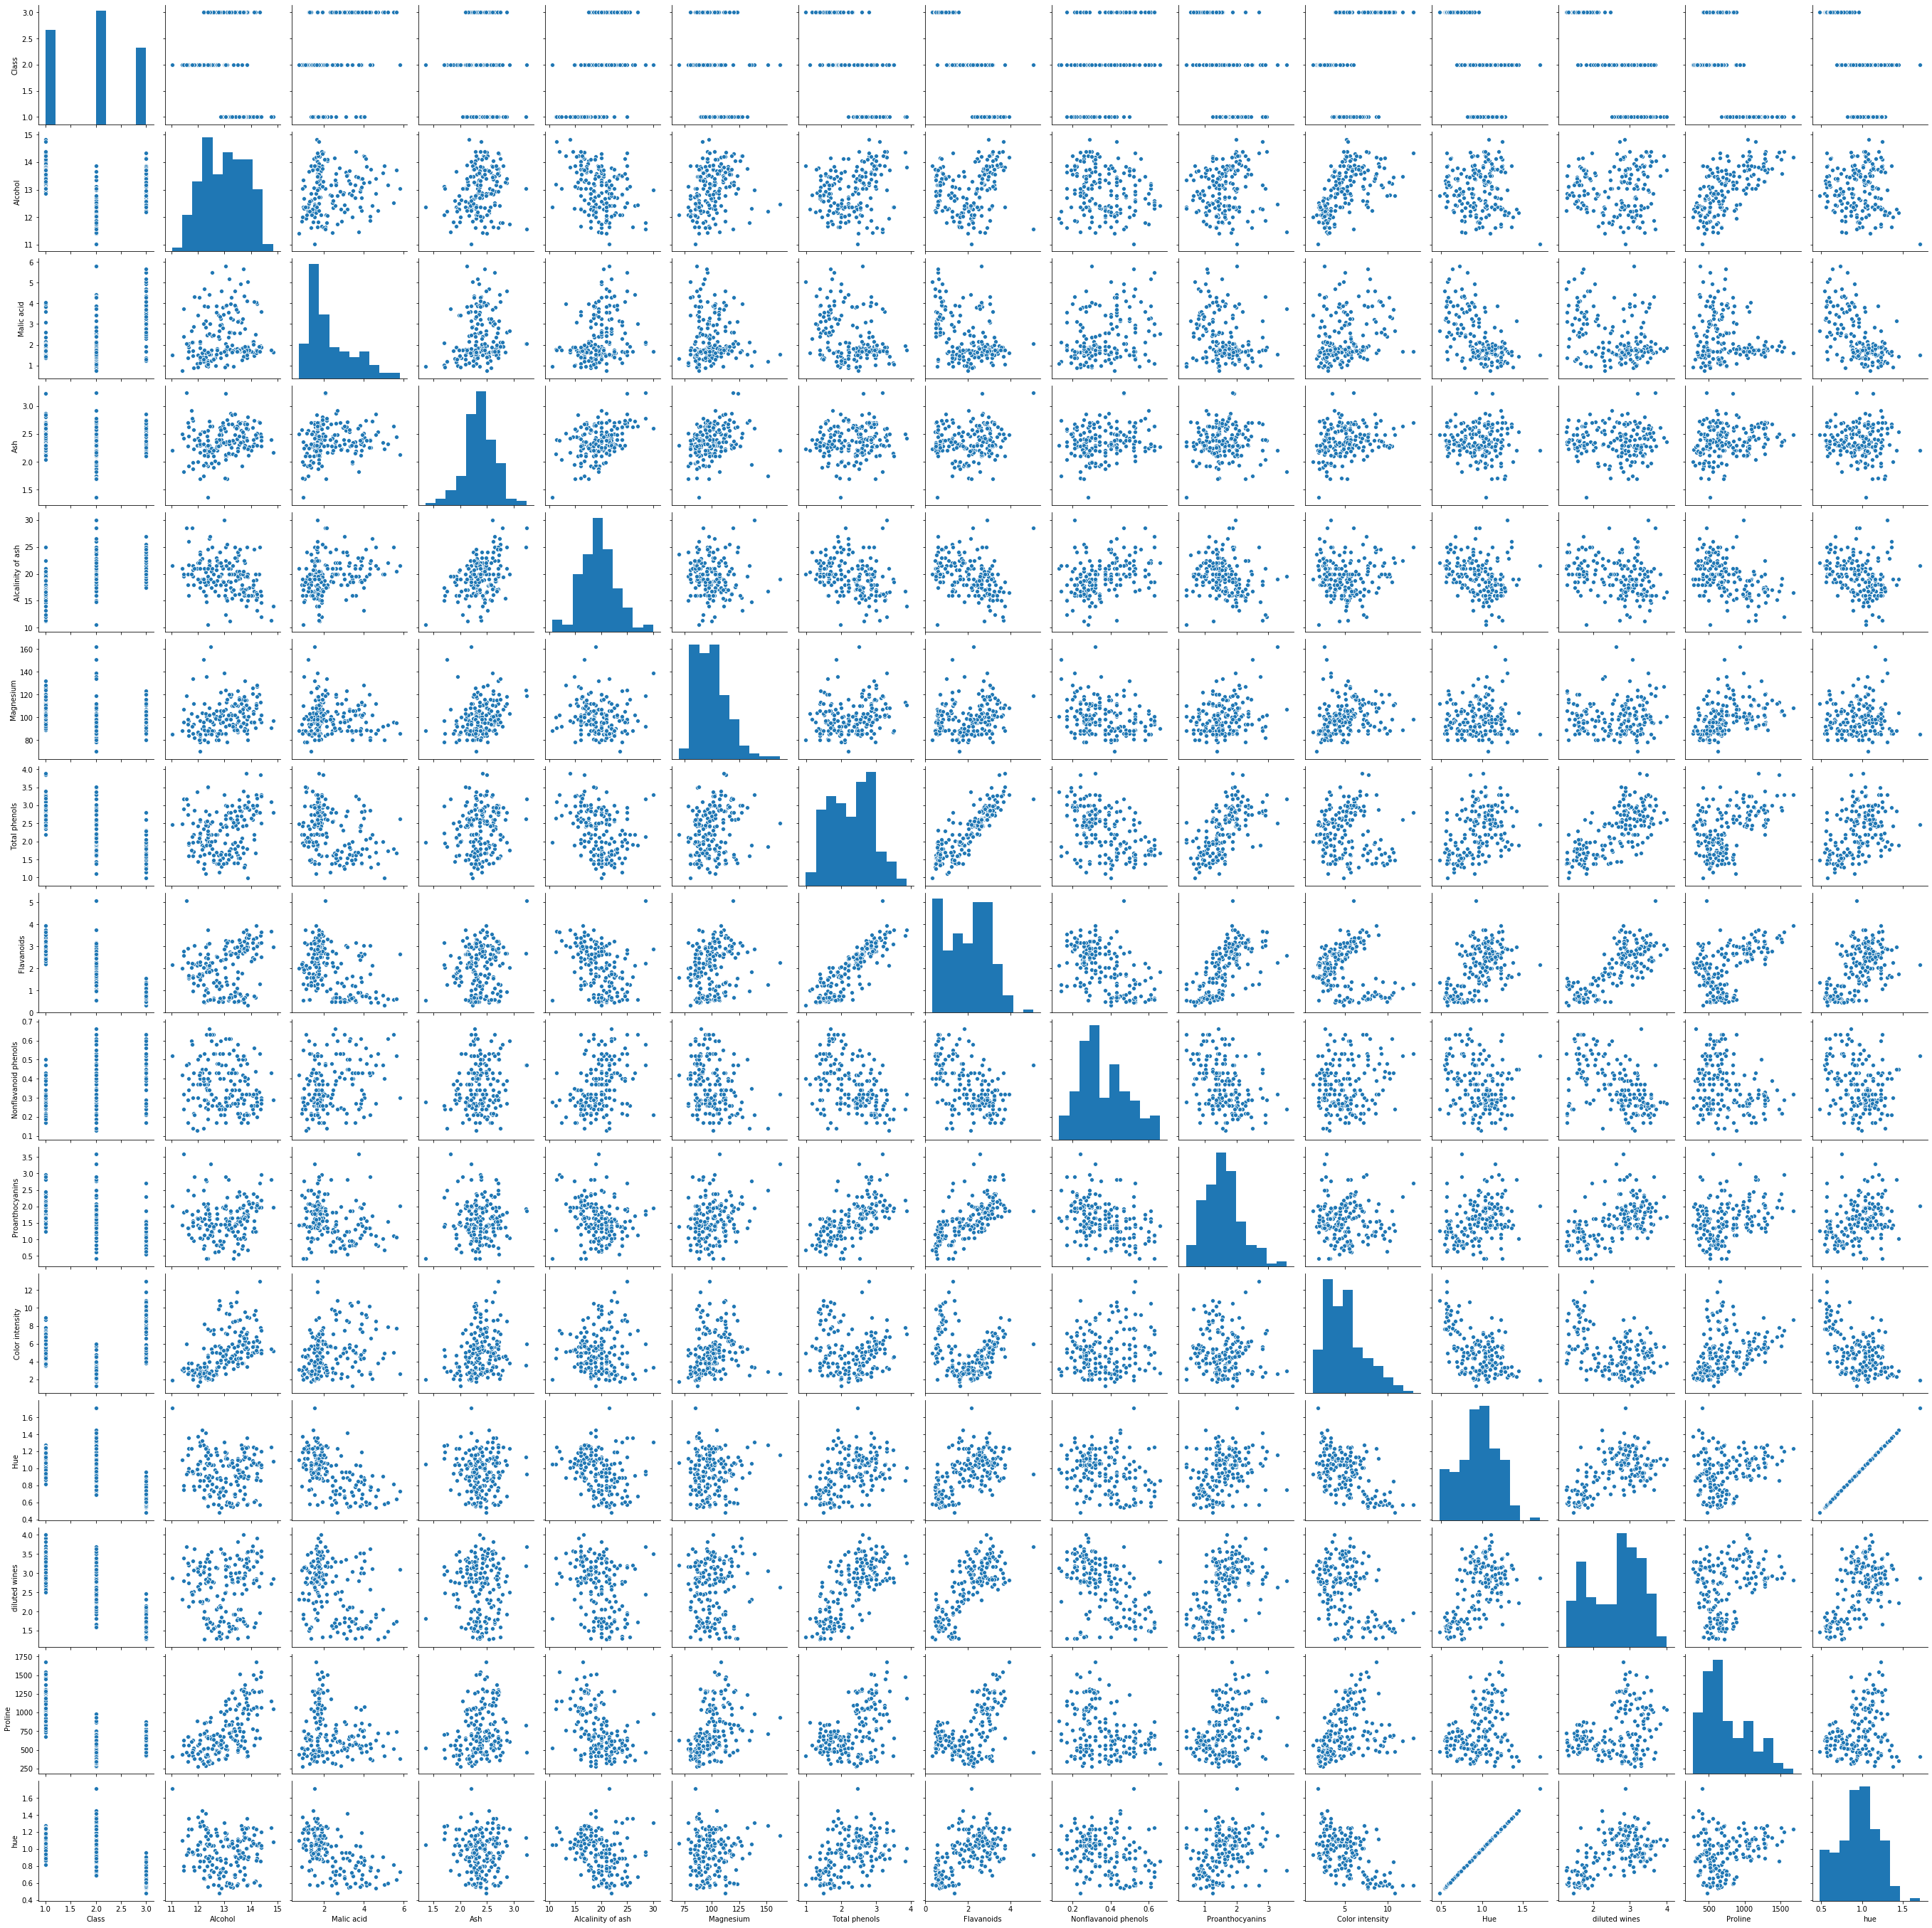

In [79]:
#drawing pair plot
sns.pairplot(df)
plt.show()